# Multimodal Models

This notebook is from [AI for Beginners Curriculum](http://aka.ms/ai-beginners).

## Experimenting with CLIP

[CLIP](https://openai.com/blog/clip/) from OpenAI is released in public, so you can try to use it for different tasks, including zero-shot image classification. Keep in mind that it is quite greedy in terms of resources!

In [2]:
import sys
!{sys.executable} -m pip install git+https://github.com/openai/CLIP.git

We will first make sure that we can use GPU if it's available, and then load CLIP model.

In [8]:
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
np.set_printoptions(precision=2,suppress=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

Let's also get a subset of cats images from [Oxford-IIIT Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/):

In [4]:
!wget https://mslearntensorflowlp.blob.core.windows.net/data/oxcats.tar.gz
!tar xfz oxcats.tar.gz
!rm oxcats.tar.gz

### Zero-Shot Image Classification

The main thing CLIP can do is to match an image with a text prompt. So, if we take an image, say, of a cat, and then try to match it with text promps "a cat", "a penguin", "a bear" - the first one is likely to have higher probability. Thus we can conlcude that we are dealing with a cat. We don't need to train a model because it has already been pre-trained on a huge dataset - thus it is called **zero-shot**.

In [7]:
image = preprocess(Image.open("oxcats/Maine_Coon_1.jpg")).unsqueeze(0).to(device)
text = clip.tokenize(["a penguin", "a bear", "a cat"]).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)

Label probs: [[0. 0. 1.]]


### Intelligent Image Search

In the previous example, there was one image the 3 text prompts. We can use CLIP in a different context, eg. we can take many images of a cat, and then select an image the best suits the textual description:

Img Index: 97


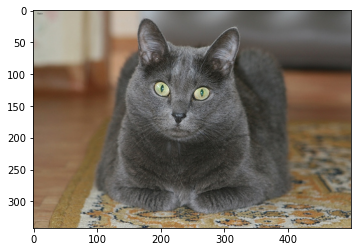

In [16]:
cats_img = [ Image.open(os.path.join("oxcats",x)) for x in os.listdir("oxcats") ] 
cats = torch.cat([ preprocess(i).unsqueeze(0) for i in cats_img ]).to(device)
text = clip.tokenize(["a very fat gray cat"]).to(device)
with torch.no_grad():
    logits_per_image, logits_per_text = model(cats, text)
    res = logits_per_text.softmax(dim=-1).argmax().cpu().numpy()

print("Img Index:", res)

plt.imshow(cats_img[res])

## Takeaway

Pre-trained CLIP model can be used to perform tasks such as image classification on common objects without domain-specific training. Also, it allows more flexible classification/image search, taking into account spatial configuration of objects on the picture.

For another exciting usage of CLIP, look for **VQGAN+CLIP**.